# FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#used to mount Google drive and create source to bring in data

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/MIT Applied DS/Foundations for Data Science/Project Assessment/foodhub_order.csv'

#assigned csv filepath to 'path' variable

### Understanding the structure of the data

In [ ]:
# read the data by calling path variable
df = pd.read_csv(path)
# returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the data dictionary. Data in each row corresponds to the order placed by a customer.

Data matches expectations of provided data dictionary. What is NaN? Some data might be industry/client specific and need to be further defined? Cafe Habana is type Mexican, but sounds Cuban. Is this material?

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
df.shape

#returns tuple with rows and columns as (rows,columns)

(1898, 9)

#### Observations: data doesn't have many columns, but has many rows (unique orders). There are 1898 rows, but only 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()
#shows column name, number of non-null values (seems like all columns are complete), data types and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: data is complete with no null values. Data column types are float64(1), int64(4), and object(4). The ratings column should just have numbers as ratings, but is data type object so either the data type was formatted incorrectly or should further investigate.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# Write your code here
#per the df.info used in question two, there are no missing values. The function below shows the nulls in each column and confirms 0 nulls

def print_nulls(dataframe): #starts function
    null_sum = dataframe.isnull().sum() #sum nulls
    print("Sum of nulls in each column:") #print text to start output
    print(null_sum) #prints nulls per column

print_nulls(df) #calls function

print(df['rating'].unique())


Sum of nulls in each column:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
['Not given' '5' '3' '4']


#### Observations: have now confirmed that data is complete. Can see that rating has ratings, but also inputs that weren't actual ratings.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
Min = df['food_preparation_time'].min() #creates Min with min value, created in case needed to call later
Average = df['food_preparation_time'].mean() #creates Average with mean value, created in case needed to call later
Max = df['food_preparation_time'].max() #creates Max with max value, created in case needed to call later

print('Min =', df['food_preparation_time'].min()) #min without additional variable
print('Average =',Average)
print('Max =',Max)


Min = 20
Average = 27.371970495258168
Max = 35


#### Observations: the food prep time does not seem to have very large fluctuations but overall max time is greater than 50% of the min time.


### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here

Not_Rated = (df['rating'] == 'Not given').sum()  #creates Not_Rated and returns number of Not given

print(Not_Rated) #prints number of Not given
print (Not_Rated / 1898) #percent of orders not rated, 1898 being row total

736
0.38777660695468913


#### Observations: a significant portion of orders are not rated (about 40%)


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

Unique Orders: 1898
Unique Customers: 1200
Unique restaurants: 178
Unique Cuisines: 14
Unique days of week: 2
Unique ratings: 4


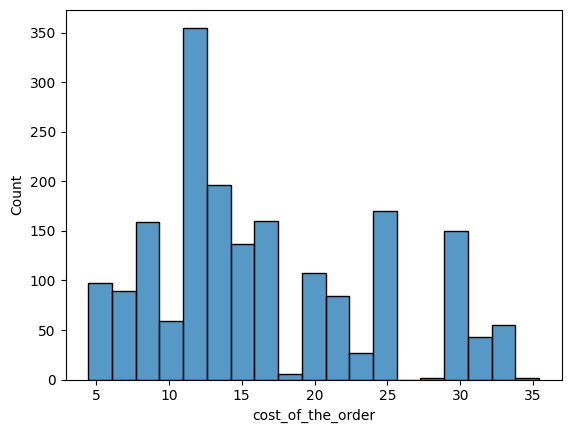

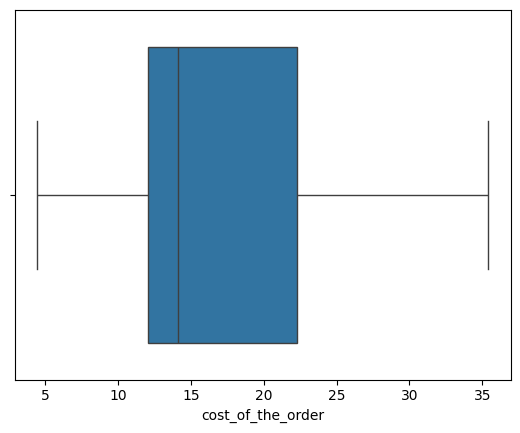

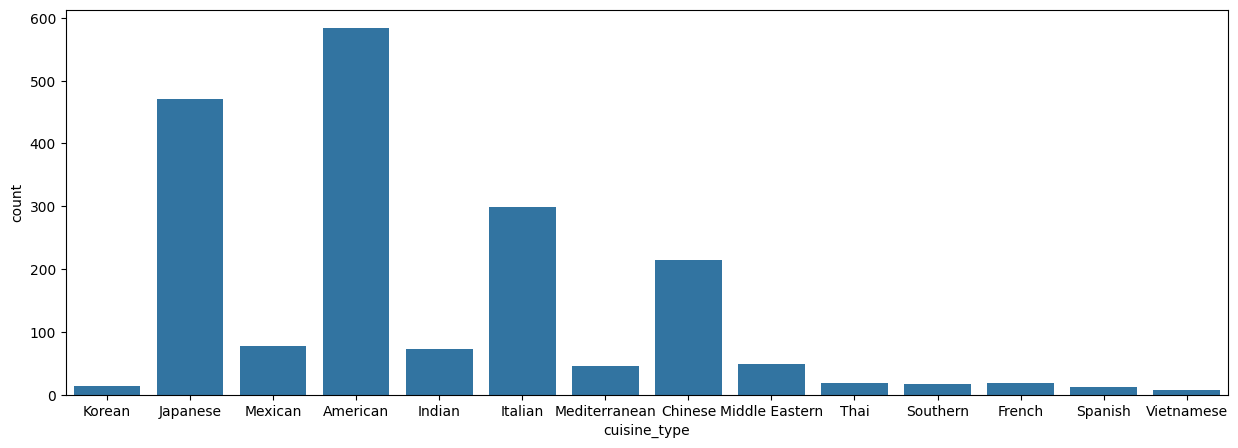

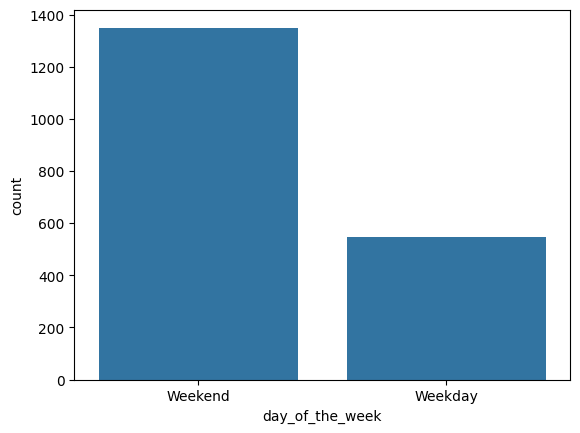

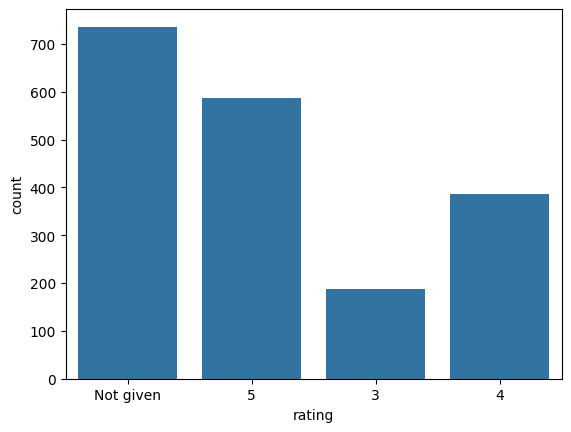

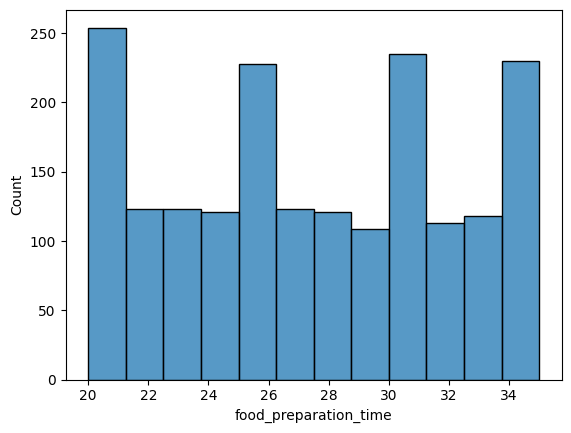

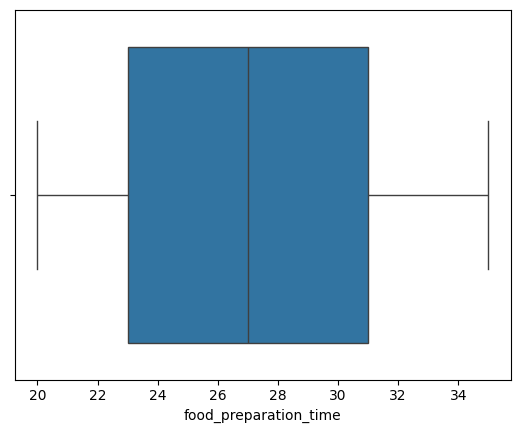

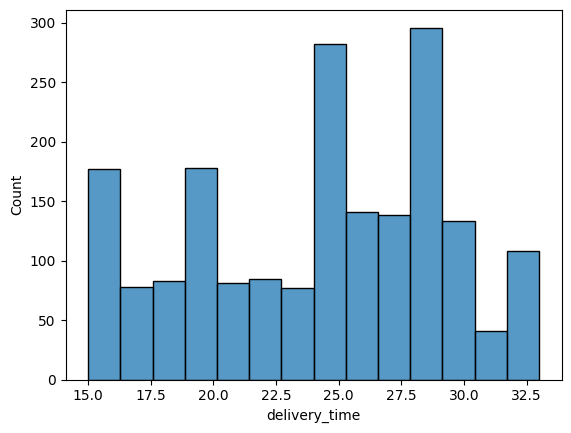

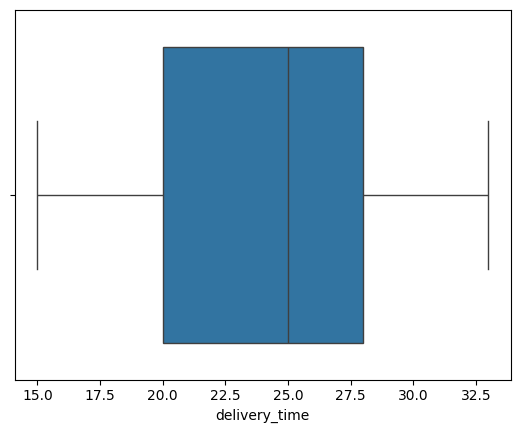

In [ ]:
# Write the code here

print("Unique Orders:",df['order_id'].nunique()) # check unique order ID
print("Unique Customers:",df['customer_id'].nunique())  # check unique customer ID
print("Unique restaurants:",df['restaurant_name'].nunique())  # check unique Restaurant name
print("Unique Cuisines:",df['cuisine_type'].nunique())  # Check unique cuisine type
print("Unique days of week:",df['day_of_the_week'].nunique()) # Check the unique values
print("Unique ratings:",df['rating'].nunique()) # Check the unique values

##Graphs##
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') # Create a countplot for cuisine type
plt.show()

sns.countplot(data = df, x = 'day_of_the_week') # Complete the code to plot a bar graph for 'day_of_the_week' column
plt.show()

sns.countplot(data = df, x = 'rating') # Complete the code to plot bar graph for 'rating' column
plt.show()
#Food Preparation time
sns.histplot(data=df,x='food_preparation_time') # Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') # Complete the code to plot the boxplot for the cost of order
plt.show()
#Delivery time
sns.histplot(data=df,x='delivery_time') # Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time')  # Complete the code to plot the boxplot for the delivery time
plt.show()

Observations: Observations: There are 1200 unique customers and 178 unique resturaunts in the data. Most orders are American, Japanese, Italian and  Chinese cuisine respectively. Most orders are on the weekend and are not rated.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?


In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().nlargest(5) # creates a list of restaurant names, counts the iterations and returns the top 5 (nlargest)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [ ]:
# Write the code here

Res_by_orders = df.groupby('restaurant_name')['order_id'].nunique().reset_index() # Groups by restaurant and unique order ID
print(Res_by_orders.nlargest(5, 'order_id')) # Prints top 5 restaurants with largest sum of number of unique IDs

Total = Res_by_orders.nlargest(5, 'order_id').sum() # Gets top 5 total
Top_5_Total = Total['order_id'].sum() # Creates list of top 5 total
print('Percent of orders from top 5: ',((Top_5_Total)*100//1898),'%',sep="") # Returns percent of top 5 of total

               restaurant_name  order_id
136                Shake Shack       219
153          The Meatball Shop       132
21           Blue Ribbon Sushi       119
20   Blue Ribbon Fried Chicken        96
109                       Parm        68
Percent of orders from top 5: 33%


#### Observations: 33% of all orders come from the top 5 restaurants. This percentage may be even higher given that some restaurants may have different iterations that are actually the same but have slightly different names (blue ribbon). First code is streamlined. Second code gives similar results but has more steps. However, second code creates variables that might be useful for analysis later and is more similar to working process in Excel, so process could be easier to explain to Excel only users.


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here

df_weekend = df[df['day_of_the_week'] == 'Weekend'] # Creates list for cuisine orders in weekend
df_weekend['cuisine_type'].value_counts().idxmax()  # Returns highest value for cuisines in weekend

'American'

In [ ]:
df_weekend = df[df['day_of_the_week'] == 'Weekend'] # Creates list for cuisine orders in weekend
most_popular_weekend_cuisines = df_weekend['cuisine_type'].value_counts().sort_values(ascending=False) # Creates list for most popular cuisine types on weekends listed highest to lowest

print(most_popular_weekend_cuisines) # Prints sorted list of cuisines

print(most_popular_weekend_cuisines.nlargest(1)) # Prints most popular cuisine



American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64
American    415
Name: cuisine_type, dtype: int64


#### Observations: majority of weekend orders come from the top 4 cusines. Some types appear redundant such as American and Southern? Would that be relevant? First code is streamlined. Second may provide more insights.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here

df_greater_than_20 = df[df['cost_of_the_order']>20] # Gets orders that cost above 20 dollars

print(round(((df_greater_than_20.shape[0] / df.shape[0]) * 100), 2), '%',sep="") # Provides answer with % sign, no spaces


print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0]) # Prints amount of orders that cost more than $20

percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100 # Creates variable for percentage of orders that cost more than $20

print("Percentage of orders above 20 dollars: ", round(percentage, 2), '%',sep="") # Prints percentage of orders that cost more than $20

29.24%
The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24%


#### Observations: First code is streamlined, second codes create variables that could be useful later. Almost 30% of all order cost more than $20.


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here

print(round((df['delivery_time'].mean()), 2)) # Prints mean delivery time

mean_del_time = df['delivery_time'].mean()  # Calculates the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes') # Prints the mean delivery time

print(round((df['delivery_time'].min()), 2))

24.16
The mean delivery time for this dataset is 24.16 minutes
15


#### Observations: First code is streamlined, second codes create variables that could be useful later. The mean delivery time is greater than 50% of the min delivery time.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Write the code here

max3 = df['customer_id'].value_counts().head(3)  # Get the counts of each customer_id and outputs top 3

print(max3)

IDcount = df['customer_id'].value_counts().sort_values(ascending=False) # Creates list for most popular cuisine types on weekends listed highest to lowest

print(IDcount) # Prints sorted list of cuisines

print(IDcount.nlargest(3)) # Prints most popular cuisine


52832    13
47440    10
83287     9
Name: customer_id, dtype: int64
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
335897     1
377481     1
125542     1
288808     1
397537     1
Name: customer_id, Length: 1200, dtype: int64
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations: First code is streamlined, second codes creates sorted list that could be useful later. Top 3 customers have 13, 10 and 9 orders respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


<ipython-input-21-6b0de6570f1f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu') # Relationship between cost of the order and cuisine type


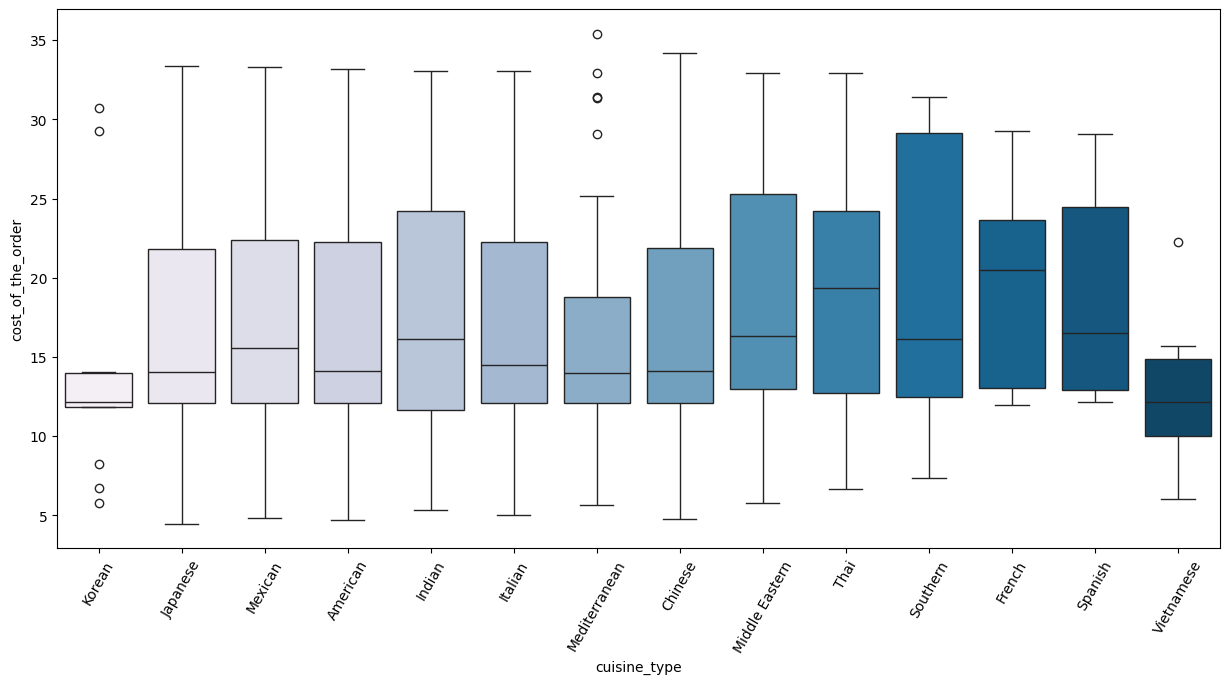

<ipython-input-21-6b0de6570f1f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  # Relationship between food preparation time and cuisine type


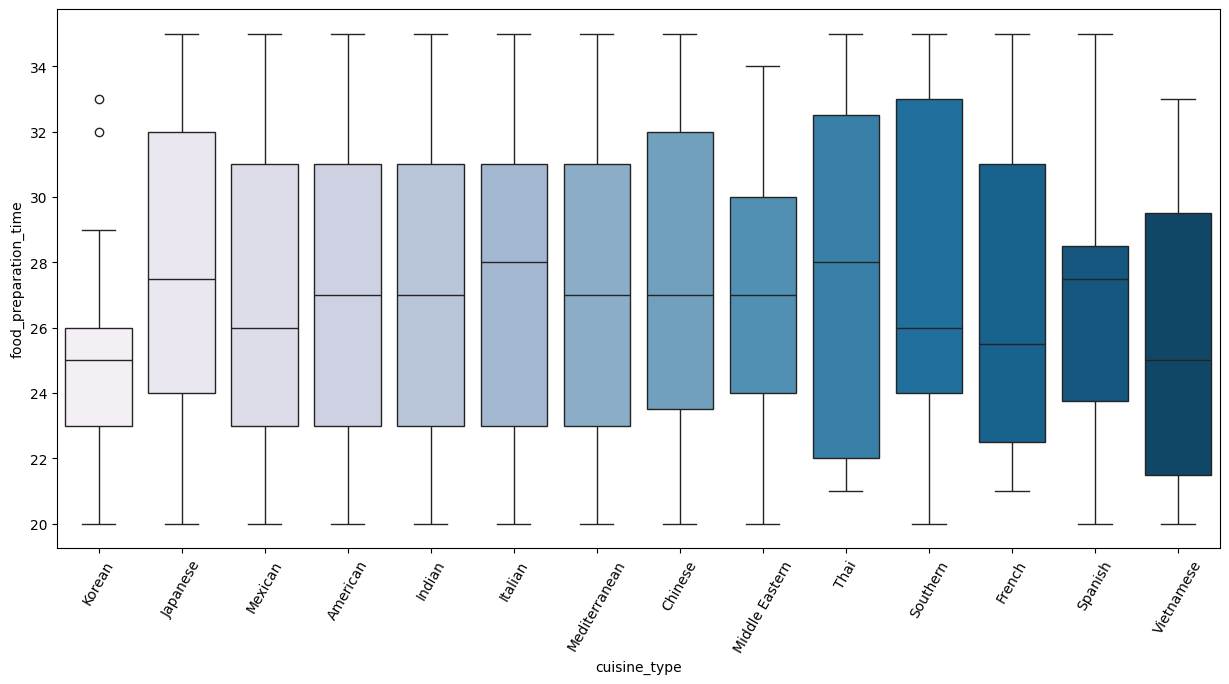

<ipython-input-21-6b0de6570f1f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df, palette = 'PuBu')  # Relationship between day of the week and delivery time


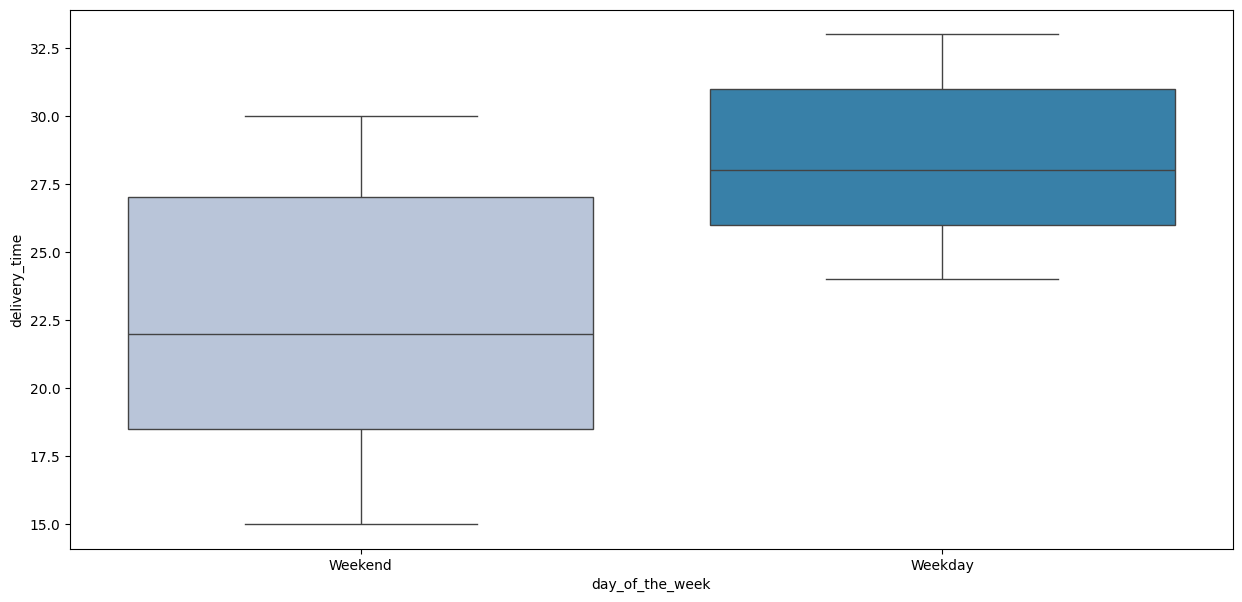

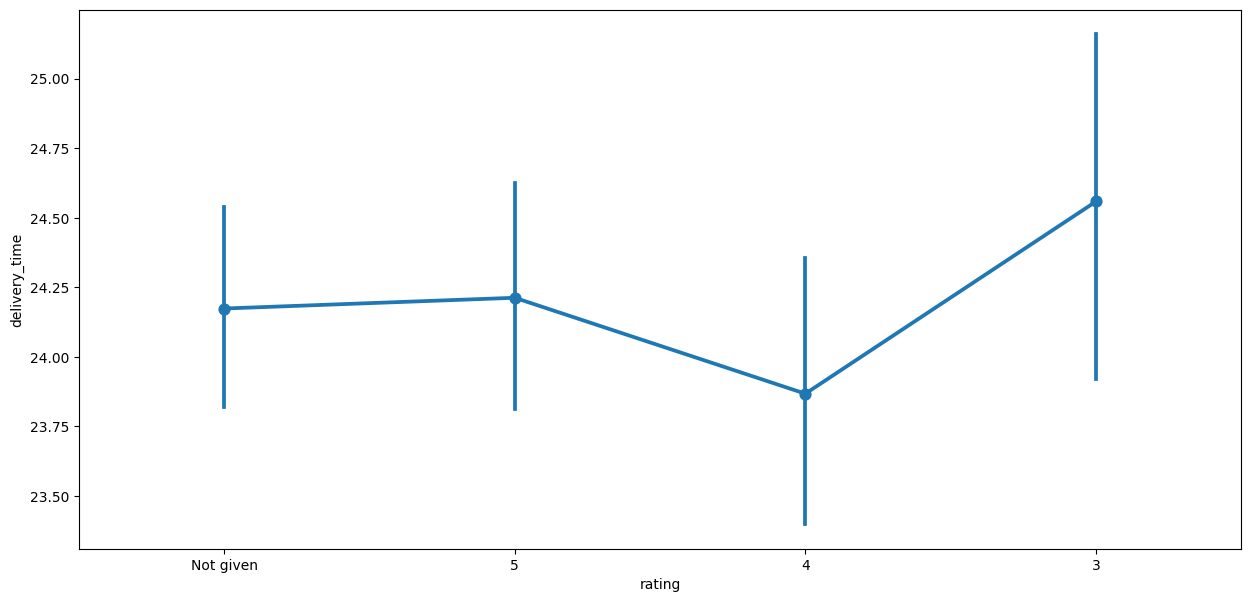

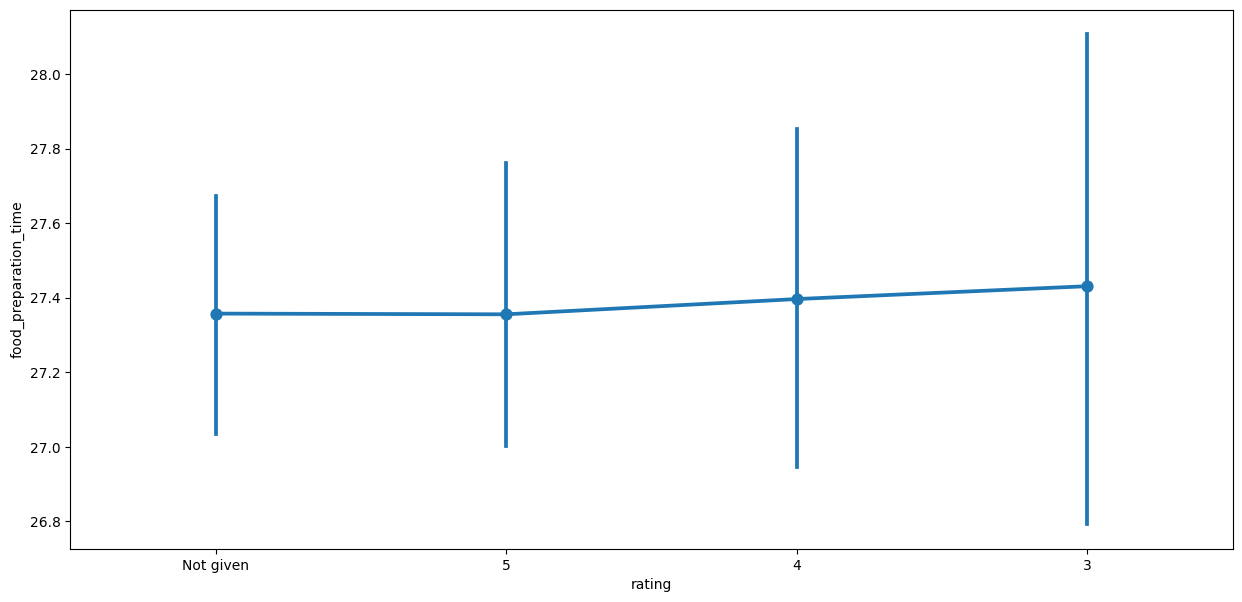

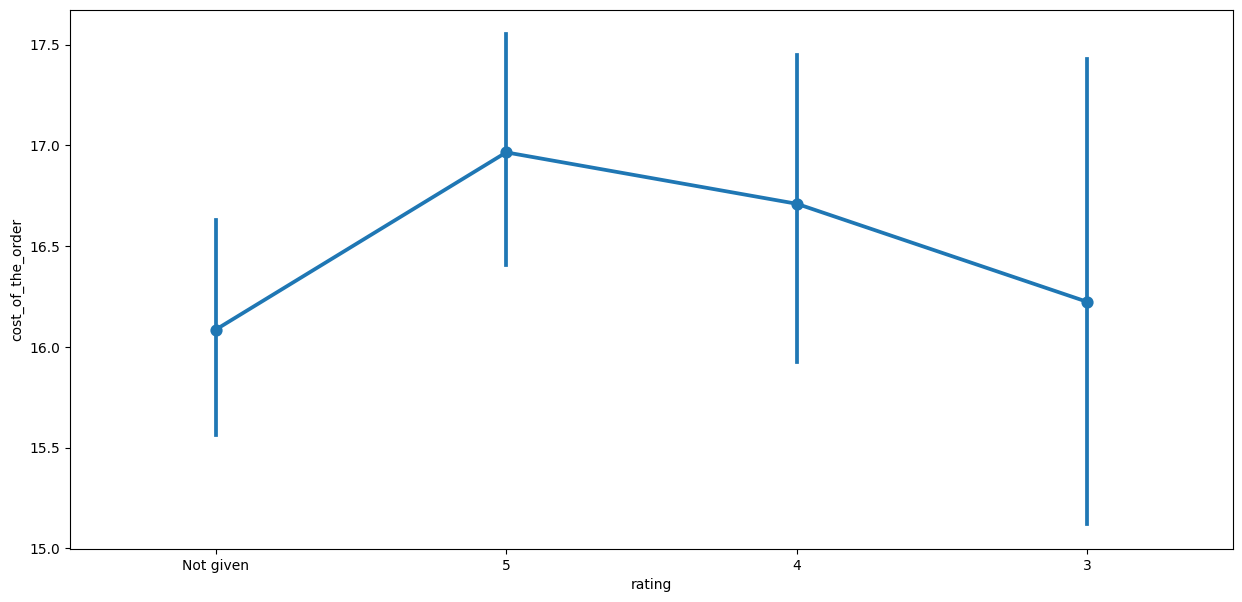

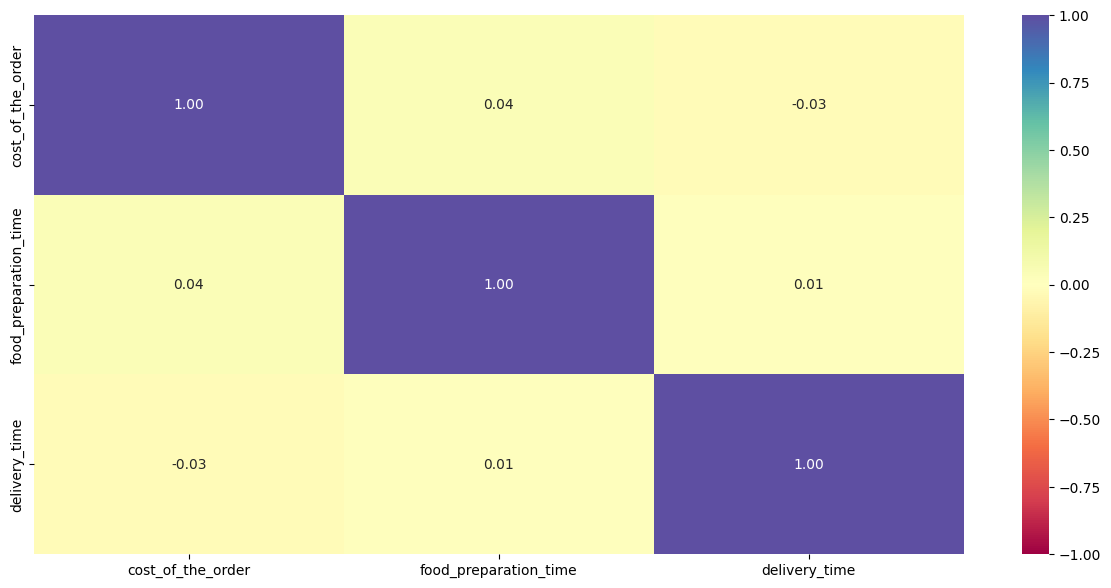

In [ ]:

#Cuisine vs Cost of the order
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu') # Relationship between cost of the order and cuisine type
plt.xticks(rotation = 60)
plt.show()

#Cuisine vs Food Preparation time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  # Relationship between food preparation time and cuisine type
plt.xticks(rotation = 60)
plt.show()

#Day of the Week vs Delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df, palette = 'PuBu')  # Relationship between day of the week and delivery time
plt.show()

#Graph Analysis

df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

#Rating vs Delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, order = sorted(df['rating'].unique(),reverse=True)) # Relationship between rating and delivery time
plt.show()
#Rating vs Food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df, order = sorted(df['rating'].unique(),reverse=True))  # Relationship between rating and food preparation time
plt.show()
#Rating vs Cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df, order = sorted(df['rating'].unique(),reverse=True))  # Relationship between rating and cost of the order
plt.show()
#Correlation among variables
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Plots the heatmap based on cost, food prep and delivery time
plt.show()

Observations: Cost remain constants over time mostly. MOre expensive orders are rated higher.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Write the code here

### Data Formatting ###
rest = df[df['rating'] != 'Not given'].copy() # Creates list with 'not given removed from data

rest['rating'] = rest['rating'].astype('int') # Converts rating column from object to integer

### Computation ###
rest_count = rest.groupby(['restaurant_name'])['rating'].count().reset_index() # Creates a df that contains the restaurant names with their rating counts

rest_50 = rest_count[rest_count['rating']>50]['restaurant_name'] # Creates a list that contains the restaurant names that have rating count more than 50

rest_mean = rest.groupby(['restaurant_name'])['rating'].mean().reset_index() # Creates a list of rest names with their average

rest_50_and_4 = rest_mean[(rest_mean['rating'] > 4) & (rest_mean['restaurant_name'].isin(rest_50))].copy() # Merges list of averages greater than 4 with ratings more than 50


print(rest_50_and_4)

print(rest_mean)

print(rest_count)


rest_count_mean = rest_count.merge(rest_mean, on='restaurant_name', how='inner') # Merges rest_count and rest_mean using inner join

rest_count_mean.rename(columns={'rating_x': 'rating_count', 'rating_y': 'mean_rating'}, inplace=True) # Renames columns to distinguish count and mean ratings

print(rest_count_mean.sort_values(by='rating_count',ascending=False))






               restaurant_name    rating
16   Blue Ribbon Fried Chicken  4.328125
17           Blue Ribbon Sushi  4.219178
117                Shake Shack  4.278195
132          The Meatball Shop  4.511905
      restaurant_name    rating
0          'wichcraft  5.000000
1           12 Chairs  4.500000
2     5 Napkin Burger  4.000000
3           67 Burger  5.000000
4                Amma  4.500000
..                ...       ...
151    Zero Otto Nove  4.000000
152              brgr  3.000000
153        da Umberto  5.000000
154  ilili Restaurant  4.153846
155         indikitch  4.500000

[156 rows x 2 columns]
      restaurant_name  rating
0          'wichcraft       1
1           12 Chairs       2
2     5 Napkin Burger       2
3           67 Burger       1
4                Amma       2
..                ...     ...
151    Zero Otto Nove       1
152              brgr       1
153        da Umberto       1
154  ilili Restaurant      13
155         indikitch       2

[156 rows x 2 columns]
   

Observations: The code to answer the initial question did not offer much in terms of valuable insights other than the question's answer. Provided additional merge join and sorted to see that Redfarm has above 4 stars but falls just short of 50 reviews. Can use promo as incentive to get restaurants to get reviews and contact ones that are close like Redfarm.

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Write the code here

# Function to determine the revenue
def compute_rev(x):
    if x > 20: #if statement making dollar amount greater than 20
        return x*0.25 #if above then 25%
    elif x > 5: #else if to try of not above $20
        return x*0.15 #if still greater than 5 then do *15%
    else:
        return x*0 #if not >20 or >5 then 0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) #applies function to create revenue amount
df.head()


def compute_rev2(x):
    if x > 2:
        return x*0.10
    else:
        return x*0

df['Revenue 2'] = df['cost_of_the_order'].apply(compute_rev2) # Computes the revenue



In [ ]:
total_rev = df['Revenue'].sum() # Calculates total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars') #prints net revenue

print(round(df['Revenue 2'].sum(), 2)) #test

The net revenue is around 6166.3 dollars
3131.48


#### Observations: Total revenue is 6166.3, but half of that can be made if we just did 10% on anything above $2 perhaps consider updating the charge schedules to more profitable formulas, if possible.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Write the code here

df['total_time'] = df['food_preparation_time'] + df['delivery_time'] # Calculates total delivery time as new column

df_y = df[df['total_time']>60] # Gets number of orders that have more than 60 minutes of total delivery time
print('The number of total orders that take longer than 60 MINs:', df_y.shape[0], 'out of',df.shape[0]) # Total orders with total delivery time higher than 60 minutes

percentage2 = (df_y.shape[0] / df.shape[0]) * 100 # Calculates orders time > 60 divided by total orders

print("Percentage of orders that take longer than 60 MINs: ", round(percentage2, 2),sep="")


The number of total orders that take longer than 60 MINs: 200 out of 1898
Percentage of orders that take longer than 60 MINs: 10.54


#### Observations: About 90% of all orders take less than 60 mins.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


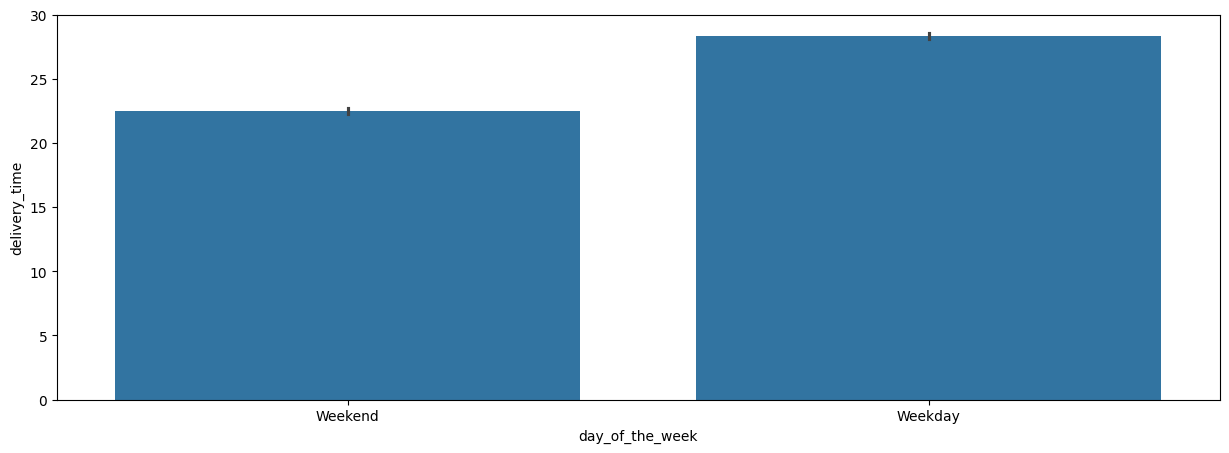

In [ ]:
# Write the code here

### Weekdays Mean ###
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

### Weekends Mean ###
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

plt.figure(figsize = (15,5))
sns.barplot(data=df,x = 'day_of_the_week', y = 'delivery_time')
plt.show()

#### Observations: Delivery takes longer on weekdays; about 6 mins more on weekdays. Perhaps investigate why weekends more efficient and see if we can make improvements.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusions:

Over 30% of orders come from 5 restaurants. 90% of orders take less than 60 minutes, but orders are faster during weekends. Some food cuisines are extremely more popular than others that they may similarities with. Some businesses are close to qualifying for advertisement promotion but fall short.


### Recommendations:

1.   Diversify restaurant offerings so orders are not so concentrated.
2.   Investigate why weekend orders are faster and see if we can leverage any efficiencies during weekends for weekdays.
3.   Combine some food categories or suggest ones that are similar like American and Southern. Or combine Asian foods like Japanese and Vietnamese, so order difference between them isn't so vast.
4.   Make businesses aware of promotions so they work to get more reviews and so try to have promotion or incentive to increase orders being rated.








---